In [1]:
# pandas nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
# numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
# plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
# matplotlib nos permite graficar bellamente
import matplotlib.pyplot as plt

%matplotlib inline

# Cargamos los datos
df = pd.read_csv('Sample9.csv',delimiter=',')

from IPython.display import display
display(df.head()) 

#print('Número de datos:',len(df))

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,74601703,G,9.6987,-9.5104,0.3662,1.8633,9.5175,0.1945,3.1031,...,G,9.7633,7.3277,-1.1524,6.3473,7.4178,0.7756,-0.1560,1,17.4922
1,165617,75100943,G,6.2039,-4.2666,0.4565,-4.4793,4.2910,-0.9121,3.0350,...,G,9.6690,7.2740,-2.8211,-5.7104,7.8019,-0.6786,-0.3700,1,11.5534
2,165617,75587682,G,19.2892,-4.2121,-0.6516,18.8121,4.2622,2.1905,-2.9881,...,G,9.8244,4.3439,-0.4735,8.7985,4.3697,1.4497,-0.1086,1,9.1636
3,165617,75660978,G,7.0427,-6.3268,-0.2685,3.0802,6.3325,0.4690,-3.0992,...,G,5.5857,4.4748,0.8489,-3.2319,4.5546,-0.6605,0.1875,1,12.4774
4,165617,75947690,G,7.2751,0.1030,-5.5331,-4.7212,5.5340,-0.7736,-1.5522,...,G,7.3181,-0.3988,6.9408,2.2825,6.9523,0.3227,1.6282,1,14.3159


# Ajuste Breit-Wigner

In [156]:
from lmfit import Model

def breit_wigner_lineal(x, A, M, gamma, m, b):
    '''
    x: la masa invariante
    A: cte de normalización
    m, b: parametros de ajuste lineal
    gamma: Hip. anchura
    '''
    return A * (M**2 * gamma**2) / ((x**2 - M**2)**2 + (M * gamma)**2) + m*x + b

model = Model(breit_wigner_lineal)


# Inspección rapida

En una inspección rapida de los datos, podemos observar:

     - 100,000 datos
     - Datos de dimuones debido al tipo 
         - G: muones globales, T: muones con solo trazas.
     - Energia y momentos en cada dirección de cada muon, ademas del momento transversal pt
 Pseudorapidez $\eta$ y angulo $\phi$

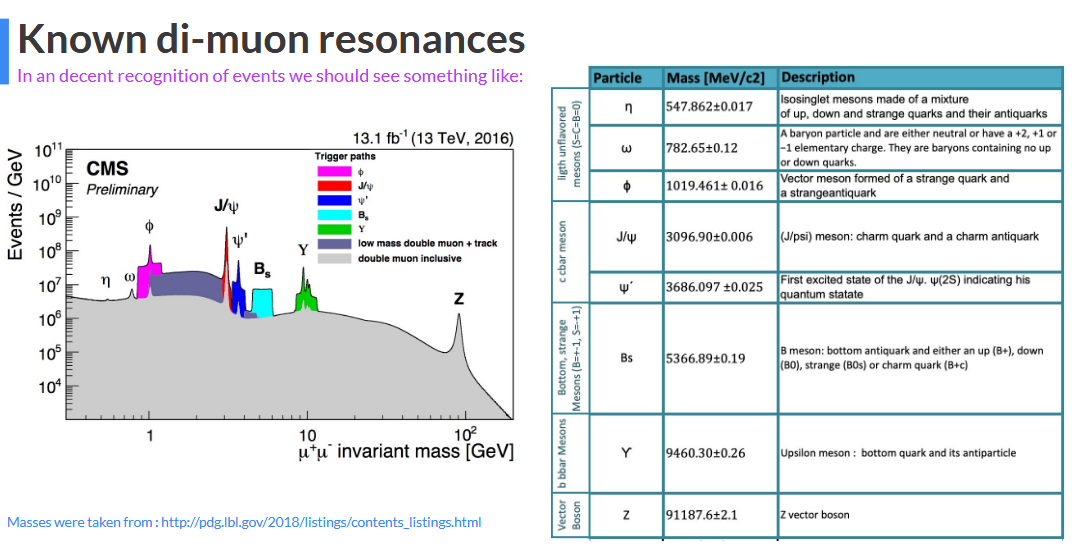

## Masas invariantes de posibles particulas

In [2]:
# Masas de particulas resonantes en decaimientos mumu y boson Z [GeV] recabado de pdg 2025 
M_omega = 0.78266 #\pm 0.000130 
M_Phi = 1.019460 # \pm 0.000016
M_JPsi= 3.096900 # \pm 0.000006
M_Psil= 3.686097 # \pm 0.000010
M_Bs  = 5.366910 # \pm 0.000110
M_Y1S   = 9.460400 # \pm 0.000100 
M_Z   = 91.18800 # \pm 0.002000
M_Y2S = 10.02326   # ± 0.00031 GeV
M_Y3S = 10.3552    # ± 0.0005 GeV

# Anchura de cada uno...



---------------
# Primer vistazo a la masa invariante
-------------

## 0 - 12 GeV

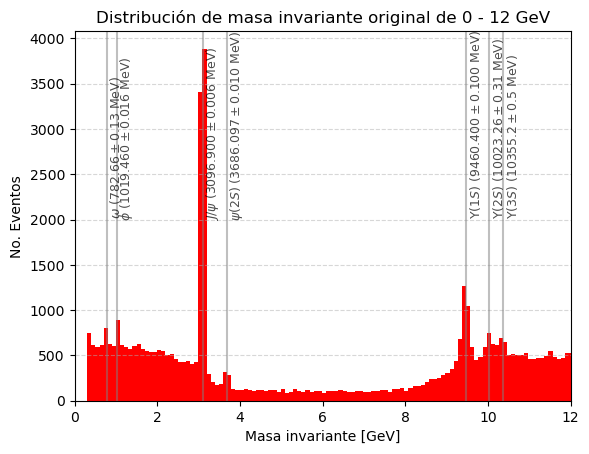

In [109]:
plt.hist(df['M'], bins = 3000, color='red', alpha = 0.5)

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title("Distribución de masa invariante original de 0 - 12 GeV")

plt.axvline(x=M_omega, alpha=0.5, c='gray')
plt.text(M_omega + 0.02, plt.ylim()[1]*0.5, 
         r'$\omega$ ($782.66 \pm 0.13$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Phi, alpha=0.5, c='gray')
plt.text(M_Phi + 0.02, plt.ylim()[1]*0.5, 
         r'$\phi$ ($1019.460 \pm 0.016$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_JPsi, alpha=0.5, c='gray')
plt.text(M_JPsi + 0.02, plt.ylim()[1]*0.5, 
         r'$J/\psi$ ($3096.900 \pm 0.006$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Psil, alpha=0.5, c='gray')
plt.text(M_Psil + 0.02, plt.ylim()[1]*0.5, 
         r'$\psi(2S)$ ($3686.097 \pm 0.010$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y1S, alpha=0.5, c='gray')
plt.text(M_Y1S + 0.05, plt.ylim()[1]*0.5, 
         r'$\Upsilon(1S)$ ($9460.400 \pm 0.100$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y2S, alpha=0.5, c='gray')
plt.text(M_Y2S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(2S)$ ($10023.26 \pm 0.31$ MeV)',
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y3S, alpha=0.5, c='gray')
plt.text(M_Y3S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(3S)$ ($10355.2 \pm 0.5$ MeV)',
         rotation=90, alpha=0.7, fontsize=9) 

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0,12)

# plt.savefig("mass_OG_0-12.pdf", dpi=300, bbox_inches='tight') 
plt.show()

## 60 - 120 GeV

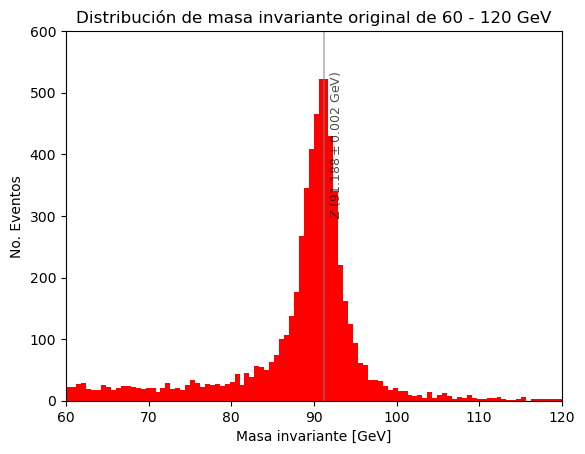

In [108]:
plt.hist(df['M'], bins = 500, color='red', alpha = 0.5)

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title("Distribución de masa invariante original de 60 - 120 GeV")
plt.xlim(60, 120)
plt.ylim(0, 600)

plt.axvline(x=M_Z, alpha=0.5, c='gray')
plt.text(M_Z + 0.5, plt.ylim()[1]*0.5, 
         r'$Z$ ($91.188 \pm 0.002$ GeV)',
         rotation=90, alpha=0.7, fontsize=9)

# plt.savefig("mass_OG_80-120.pdf", dpi=300, bbox_inches='tight') 
plt.show()

# Corte en tipo de muones 
----------------

In [4]:

mask_mu = (df['type1'] == 'G') & (df['type2'] == 'G')
corte_G = df[mask_mu].copy()

print('No. de datos',len(corte_G))
print((len(corte_G)*100)/100000, '%')
print('No. de datos excluidos:',100000 - len(corte_G))
print(((100000 - len(corte_G))*100)/100000, '%')

No. de datos 93474
93.474 %
No. de datos excluidos: 6526
6.526 %


## 0 - 12 GeV

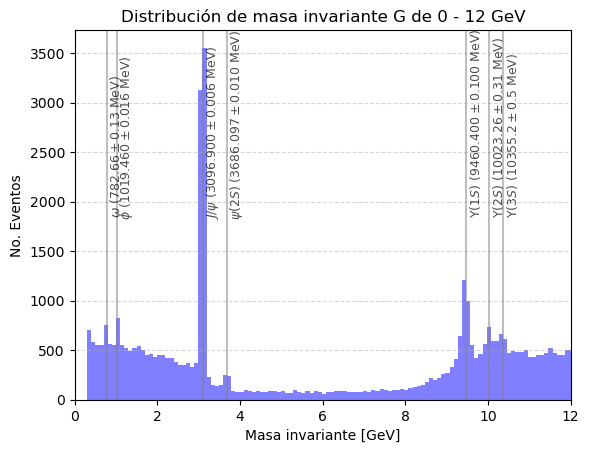

In [114]:
plt.hist(corte_G['M'], bins = 3000, color='blue', alpha = 0.5)

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title("Distribución de masa invariante G de 0 - 12 GeV")

plt.axvline(x=M_omega, alpha=0.5, c='gray')
plt.text(M_omega + 0.02, plt.ylim()[1]*0.5, 
         r'$\omega$ ($782.66 \pm 0.13$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Phi, alpha=0.5, c='gray')
plt.text(M_Phi + 0.02, plt.ylim()[1]*0.5, 
         r'$\phi$ ($1019.460 \pm 0.016$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_JPsi, alpha=0.5, c='gray')
plt.text(M_JPsi + 0.02, plt.ylim()[1]*0.5, 
         r'$J/\psi$ ($3096.900 \pm 0.006$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Psil, alpha=0.5, c='gray')
plt.text(M_Psil + 0.02, plt.ylim()[1]*0.5, 
         r'$\psi(2S)$ ($3686.097 \pm 0.010$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y1S, alpha=0.5, c='gray')
plt.text(M_Y1S + 0.05, plt.ylim()[1]*0.5, 
         r'$\Upsilon(1S)$ ($9460.400 \pm 0.100$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y2S, alpha=0.5, c='gray')
plt.text(M_Y2S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(2S)$ ($10023.26 \pm 0.31$ MeV)',
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y3S, alpha=0.5, c='gray')
plt.text(M_Y3S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(3S)$ ($10355.2 \pm 0.5$ MeV)',
         rotation=90, alpha=0.7, fontsize=9) 

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0,12)

# plt.savefig("mass_G_0-12.pdf", dpi=300, bbox_inches='tight') 
plt.show()

## 60 - 120 GeV

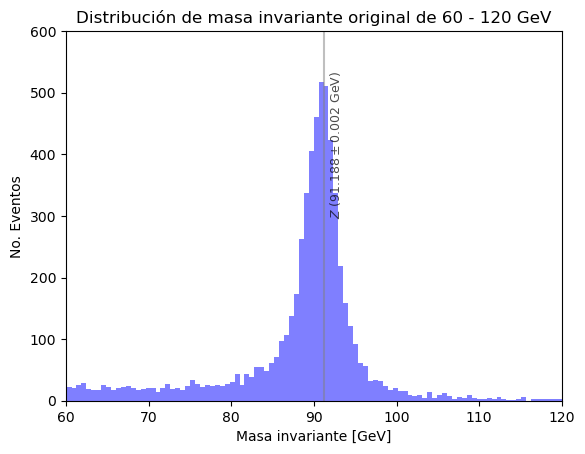

In [115]:
plt.hist(corte_G['M'], bins = 500, color='blue', alpha=0.5)

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title("Distribución de masa invariante original de 60 - 120 GeV")
plt.xlim(60, 120)
plt.ylim(0, 600)

plt.axvline(x=M_Z, alpha=0.5, c='gray')
plt.text(M_Z + 0.5, plt.ylim()[1]*0.5, 
         r'$Z$ ($91.188 \pm 0.002$ GeV)',
         rotation=90, alpha=0.7, fontsize=9)

# plt.savefig("mass_G_80-120.pdf", dpi=300, bbox_inches='tight') 
plt.show()

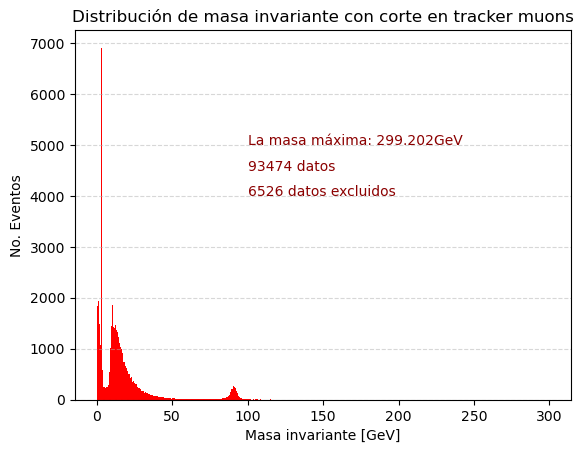

In [6]:
plt.hist(corte_G['M'], bins = 1000, color='red')

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title("Distribución de masa invariante con corte en tracker muons")

plt.text(100,5000, 'La masa máxima: ' + str(max(corte_G['M'])) + 'GeV', c='darkred')
plt.text(100, 4000, str(100000 - len(corte_G)) + ' datos excluidos', c='darkred')
plt.text(100, 4500, str( len(corte_G)) + ' datos', c='darkred')
plt.grid(axis='y', linestyle='--', alpha=0.5)
#plt.ylim(0,2000)

plt.savefig("mass_distri_woTmu.png", dpi=300, bbox_inches='tight') 
plt.show()

# Corte en masa invariante

In [39]:
mask_M = df['M'] < 120

corte_MG = df[mask_mu & mask_M].copy()

print('No. de datos',len(corte_MG))
print((len(corte_MG)*100)/100000, '%')
print('No. de datos excluidos:',len(corte_G) - len(corte_MG))
print(((len(corte_G) - len(corte_MG))*100)/100000, '%')

No. de datos 93394
93.394 %
No. de datos excluidos: 80
0.08 %


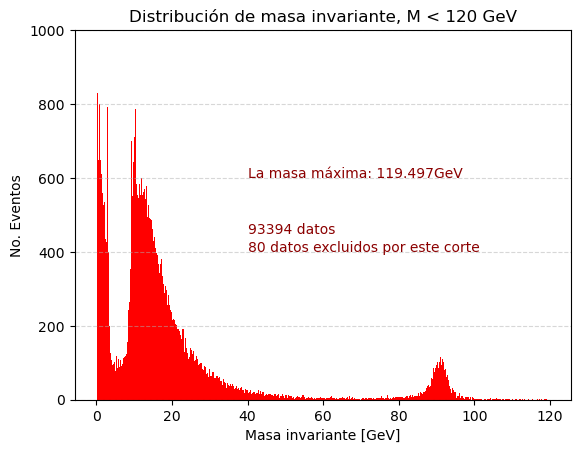

In [8]:
plt.hist(corte_MG['M'], bins = 1000, color='red')

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title("Distribución de masa invariante, M < 120 GeV")

plt.text(40,600, 'La masa máxima: ' + str(max(corte_MG['M'])) + 'GeV', c='darkred')
plt.text(40, 400, str(len(corte_G) - len(corte_MG)) + ' datos excluidos por este corte', c='darkred')
plt.text(40, 450, str(len(corte_MG)) + ' datos', c='darkred')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(0,1000)
plt.savefig("mass_distri_woTmu&120Gev.png", dpi=300, bbox_inches='tight') 
plt.show()

# Corte Pseudorapidez

In [46]:
mask_eta = (df['eta1'].abs() < 2.3) & (df['eta2'].abs() < 2.3)
corte_MG_eta = df[mask_mu & mask_M & mask_eta].copy()

print('No. de datos',len(corte_MG_eta))
print((len(corte_MG_eta)*100)/100000, '%')
print('No. de datos excluidos:',len(corte_MG) - len(corte_MG_eta))
print(((len(corte_MG) - len(corte_MG_eta))*100)/100000, '%')

No. de datos 91111
91.111 %
No. de datos excluidos: 2283
2.283 %


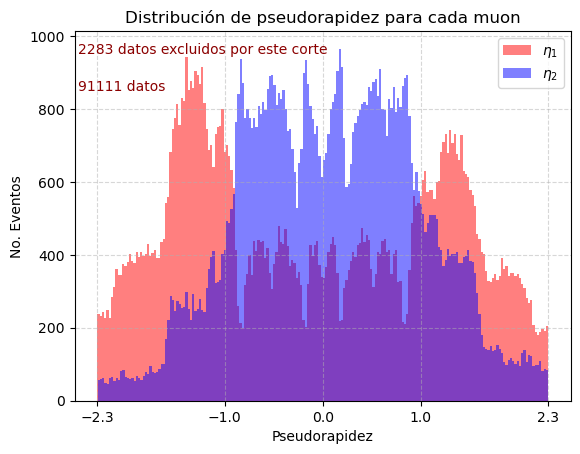

In [44]:
xticks =  [-2.3, -1, 0, 1, 2.3 ]

plt.hist(corte_MG_eta['eta1'], bins=200, alpha=0.5, label=r'$\eta_1$', color='red')
plt.hist(corte_MG_eta['eta2'], bins=200, alpha=0.5, label=r'$\eta_2$', color='blue')
plt.xlabel('Pseudorapidez')
plt.ylabel("No. Eventos")
plt.title("Distribución de pseudorapidez para cada muon")

plt.text(-2.5, 950, str(len(corte_MG) - len(corte_MG_eta)) + ' datos excluidos por este corte', c='darkred')
plt.text(-2.5, 850, str(len(corte_MG_eta)) + ' datos', c='darkred')

plt.xticks(xticks)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig("eta_distribution.png", dpi=300, bbox_inches='tight') 
plt.show()

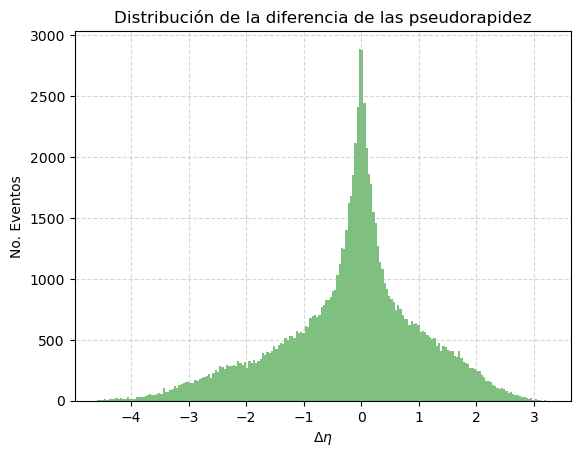

In [11]:
delta_eta = corte_MG_eta['eta1'] - corte_MG_eta['eta2']

plt.hist(delta_eta, bins=200, alpha=0.5, color='green')
plt.xlabel(r'$\Delta \eta$')
plt.ylabel("No. Eventos")
plt.title("Distribución de la diferencia de las pseudorapidez")

plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig("delta_eta_distribution_ini.png", dpi=300, bbox_inches='tight') 
plt.show()

-------------------------------------------
# Mass (G , M < 120, |$\eta$| <2.3) 
-------------------------------------------

## Intervalo de 0 - 4 GeV

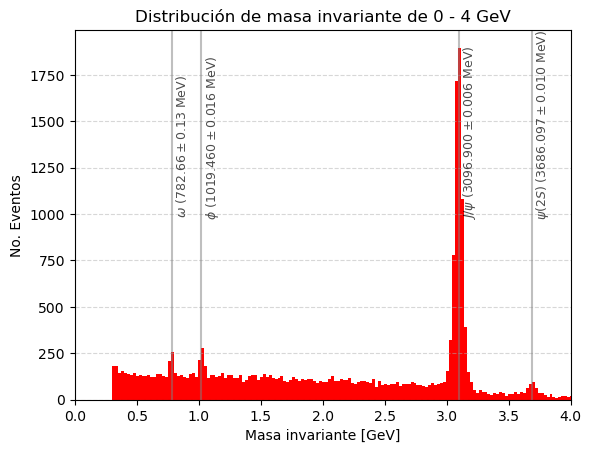

In [82]:
plt.hist(corte_MG_eta['M'], bins = 5000, color='red')

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title(r"Distribución de masa invariante (G , |$\eta$| < 2.3) de 0 - 4 GeV")

plt.axvline(x=M_omega, alpha=0.5, c='gray')
plt.text(M_omega + 0.02, plt.ylim()[1]*0.5, 
         r'$\omega$ ($782.66 \pm 0.13$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Phi, alpha=0.5, c='gray')
plt.text(M_Phi + 0.02, plt.ylim()[1]*0.5, 
         r'$\phi$ ($1019.460 \pm 0.016$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_JPsi, alpha=0.5, c='gray')
plt.text(M_JPsi + 0.02, plt.ylim()[1]*0.5, 
         r'$J/\psi$ ($3096.900 \pm 0.006$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Psil, alpha=0.5, c='gray')
plt.text(M_Psil + 0.02, plt.ylim()[1]*0.5, 
         r'$\psi(2S)$ ($3686.097 \pm 0.010$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)


plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0, 4)
# plt.savefig("mass_distri_0-4.png", dpi=300, bbox_inches='tight') 

plt.show()



--------------------------------------
## Intervalo de 4 - 12 GeV
------------------------------------

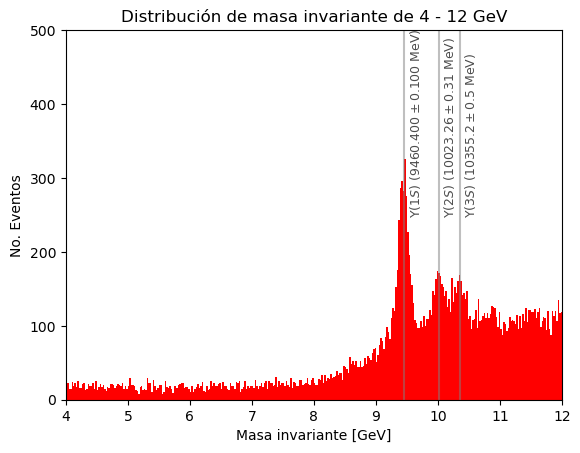

In [83]:
plt.hist(corte_MG_eta['M'], bins = 5000, color='red')

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title(r"Distribución de masa invariante (G , |$\eta$| < 2.3) de 4 - 12 GeV")
plt.ylim(0,500)
plt.xlim(4, 12)

plt.axvline(x=M_Y1S, alpha=0.5, c='gray')
plt.text(M_Y1S + 0.05, plt.ylim()[1]*0.5, 
         r'$\Upsilon(1S)$ ($9460.400 \pm 0.100$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y2S, alpha=0.5, c='gray')
plt.text(M_Y2S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(2S)$ ($10023.26 \pm 0.31$ MeV)',
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y3S, alpha=0.5, c='gray')
plt.text(M_Y3S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(3S)$ ($10355.2 \pm 0.5$ MeV)',
         rotation=90, alpha=0.7, fontsize=9) 


# plt.savefig("mass_distri_4-12.png", dpi=300, bbox_inches='tight') 

plt.show()

-----------------------------------------
## Intervalo de 0 - 12 GeV
-------------------------------

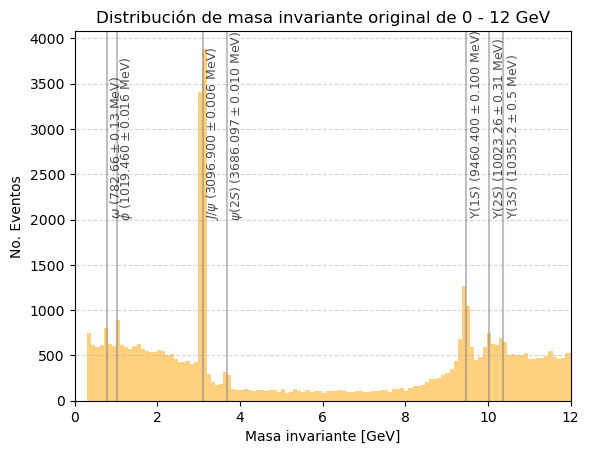

In [113]:
plt.hist(corte_MG_eta['M'], bins = 3000, color='orange', alpha = 0.5)

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title("Distribución de masa invariante original de 0 - 12 GeV")

plt.axvline(x=M_omega, alpha=0.5, c='gray')
plt.text(M_omega + 0.02, plt.ylim()[1]*0.5, 
         r'$\omega$ ($782.66 \pm 0.13$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Phi, alpha=0.5, c='gray')
plt.text(M_Phi + 0.02, plt.ylim()[1]*0.5, 
         r'$\phi$ ($1019.460 \pm 0.016$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_JPsi, alpha=0.5, c='gray')
plt.text(M_JPsi + 0.02, plt.ylim()[1]*0.5, 
         r'$J/\psi$ ($3096.900 \pm 0.006$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Psil, alpha=0.5, c='gray')
plt.text(M_Psil + 0.02, plt.ylim()[1]*0.5, 
         r'$\psi(2S)$ ($3686.097 \pm 0.010$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y1S, alpha=0.5, c='gray')
plt.text(M_Y1S + 0.05, plt.ylim()[1]*0.5, 
         r'$\Upsilon(1S)$ ($9460.400 \pm 0.100$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y2S, alpha=0.5, c='gray')
plt.text(M_Y2S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(2S)$ ($10023.26 \pm 0.31$ MeV)',
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y3S, alpha=0.5, c='gray')
plt.text(M_Y3S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(3S)$ ($10355.2 \pm 0.5$ MeV)',
         rotation=90, alpha=0.7, fontsize=9) 

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0,12)

# plt.savefig("mass_Geta_0-12.pdf", dpi=300, bbox_inches='tight') 
plt.show()

------------------------------------------
## Intervalo de 60 - 120 GeV
------------------------------------

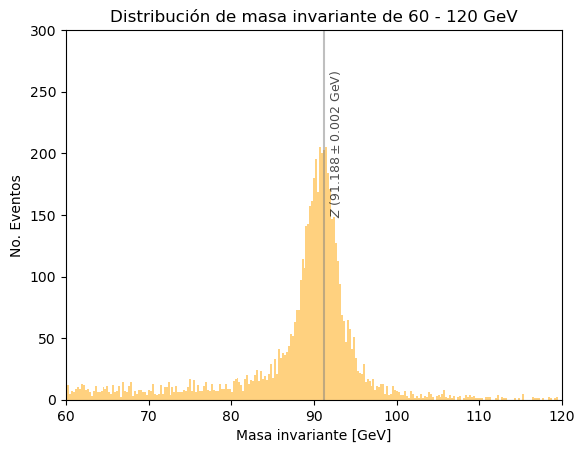

In [116]:
plt.hist(corte_MG_eta['M'], bins = 500, color='orange', alpha = 0.5)

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title("Distribución de masa invariante de 60 - 120 GeV")
plt.xlim(60, 120)
plt.ylim(0, 300)

plt.axvline(x=M_Z, alpha=0.5, c='gray')
plt.text(M_Z + 0.5, plt.ylim()[1]*0.5, 
         r'$Z$ ($91.188 \pm 0.002$ GeV)',
         rotation=90, alpha=0.7, fontsize=9)

plt.savefig("mass_distri_80-120.png", dpi=300, bbox_inches='tight') 
plt.show()

# Observacion de vars

## Carga Total

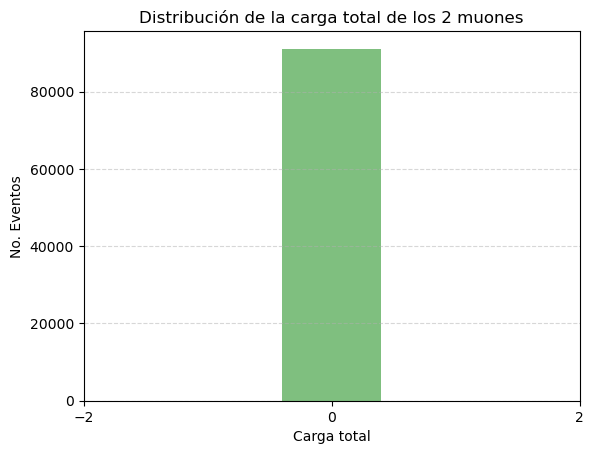

In [17]:
Q_values, counts = np.unique(corte_MG_eta['Q1'] + corte_MG_eta['Q2'], return_counts=True)


plt.bar(Q_values, counts, color='green', alpha=0.5)

plt.xlabel("Carga total")
plt.ylabel("No. Eventos")
plt.title("Distribución de la carga total de los 2 muones")

plt.xticks([-2, 0, 2])
plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.savefig("charge_distribution_ini.png", dpi=300, bbox_inches='tight') 
plt.show()

## Phi

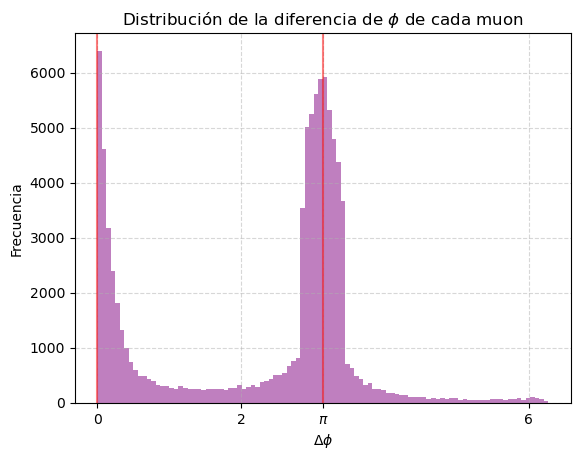

In [132]:
delta_phi = corte_MG_eta['phi2'] - corte_MG_eta['phi1']

plt.hist(delta_phi.abs(), bins=100, alpha=0.5, color='purple')
plt.xlabel(r'$\Delta \phi$')
plt.ylabel("Frecuencia")
plt.title(r"Distribución de la diferencia de $\phi$ de cada muon")

# Add vertical lines
plt.axvline(x=np.pi, alpha=0.5, color='red')
#plt.axvline(x=-np.pi, alpha=0.5, color='red')
plt.axvline(x=0, alpha=0.5, color='red')

# Get current ticks and add the special ones
current_xticks = [ 0, 2, 6]  
special_xticks = [0, np.pi]  
all_xticks = sorted(set(current_xticks + special_xticks))  # Combine and remove duplicates



plt.xticks(all_xticks, [ '0', '2', r'$\pi$', '6']) 

plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("deltaphi_distribution_ini.pdf", dpi=300, bbox_inches='tight') 
plt.show()

# Momento

In [20]:
print(max(corte_MG_eta['pt1']))
print(max(corte_MG_eta['pt2']))

204.698
528.434


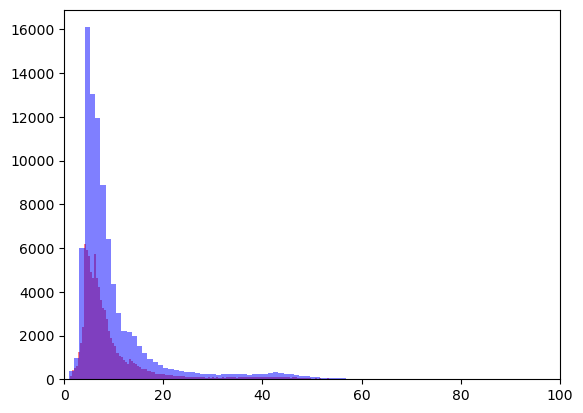

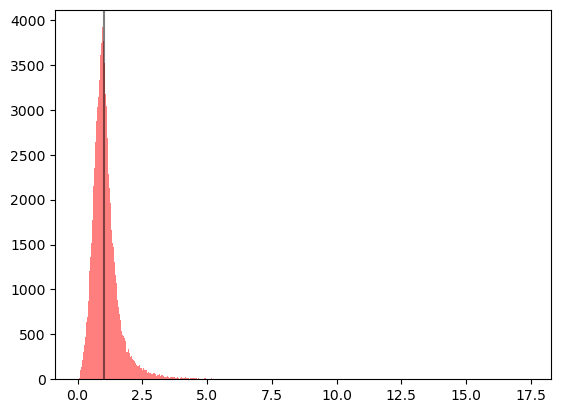

In [21]:
plt.hist(corte_MG_eta['pt1'], bins = 500, color='red', alpha = 0.5)
plt.hist(corte_MG_eta['pt2'], bins = 500, color='blue', alpha = 0.5)
plt.xlim(0,100)
plt.show()
'''
mask_pt = (df['pt1'] < 100) & (df['pt2'] < 100)
corte_Gpt = df[mask_pt & mask_mu].copy()
'''
ratio_pt = corte_MG_eta['pt1']/corte_MG_eta['pt2']
delta_pt = corte_MG_eta['pt1'] - corte_MG_eta['pt2']
plt.hist(ratio_pt, bins = 500, color='red', alpha = 0.5)
plt.axvline(x=1, alpha= 0.5, c='black')
plt.show()


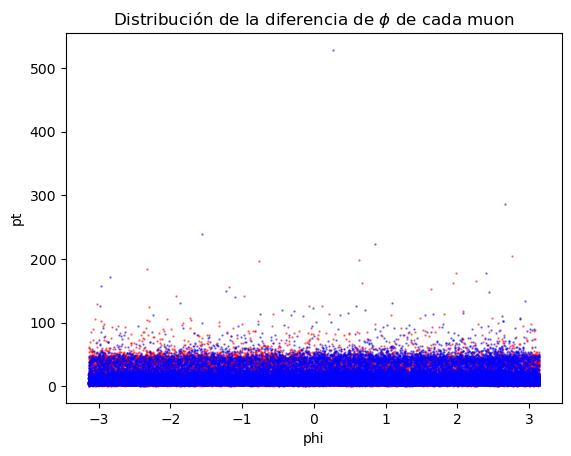

In [22]:
plt.scatter(corte_MG_eta['phi1'], corte_MG_eta['pt1'], s=0.5, alpha = 0.5, c='red')
plt.scatter(corte_MG_eta['phi2'], corte_MG_eta['pt2'], s=0.5, alpha = 0.5, c='blue')
plt.xlabel(r'phi')
plt.ylabel('pt')
plt.title(r"Distribución de la diferencia de $\phi$ de cada muon")
plt.show()

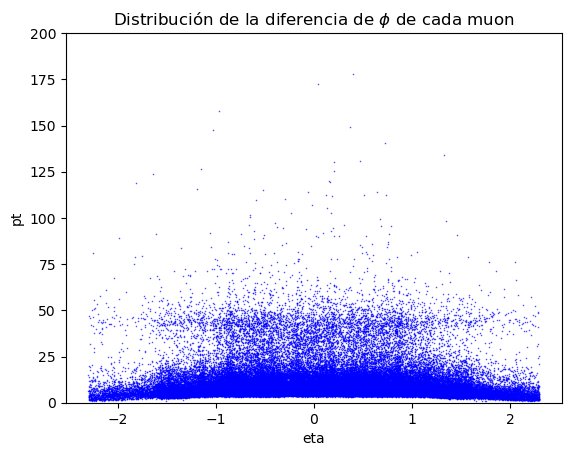

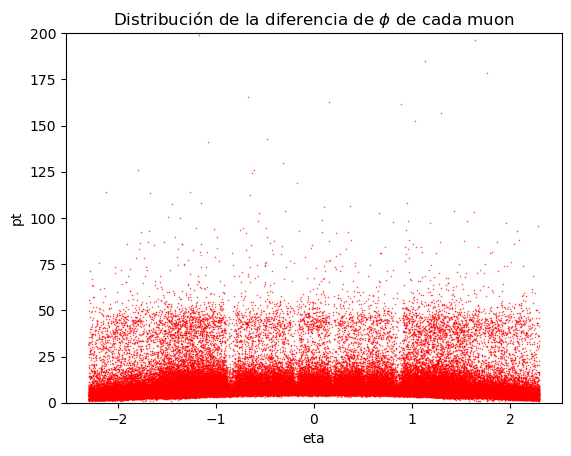

In [23]:
plt.scatter(corte_MG_eta['eta2'], corte_MG_eta['pt2'], lw=0.5, s=0.5, alpha = 0.5, c='blue')
plt.xlabel(r'eta')
plt.ylabel('pt')
plt.title(r"Distribución de la diferencia de $\phi$ de cada muon")
plt.ylim(0,200)
plt.show()

plt.scatter(corte_MG_eta['eta1'], corte_MG_eta['pt1'], lw=0.5, s=0.5, alpha = 0.5, c='red')
plt.xlabel(r'eta')
plt.ylabel('pt')
plt.title(r"Distribución de la diferencia de $\phi$ de cada muon")
plt.ylim(0,200)
plt.show()

# Masa transversal

In [24]:
#Et1 = corte_MG_eta['E1']/np.cosh(corte_MG_eta['eta1'])
#Et2 = corte_MG_eta['E2']/np.cosh(corte_MG_eta['eta2'])

et1 = np.sqrt(corte_MG_eta['E1']**2  - corte_MG_eta['pt1']**2)
et2 = np.sqrt(corte_MG_eta['E2']**2  - corte_MG_eta['pt2']**2)


Mt = 2*(et1*et2 - corte_MG_eta['pt1']*corte_MG_eta['pt2'])

print(max(Mt))

338927.4853888613


C:\Users\ASUS\miniconda3\envs\Analisis_datos_Particulas\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


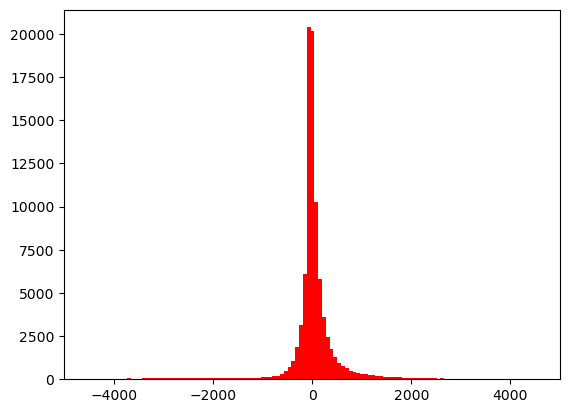

In [25]:
plt.hist(Mt, bins = 5000, color='red')
plt.xlim(-5000,5000)
plt.show()


# Graficas interesantes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5696\2372299621.py:14: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("pt1pt2_evo.pdf", dpi=300, bbox_inches='tight')


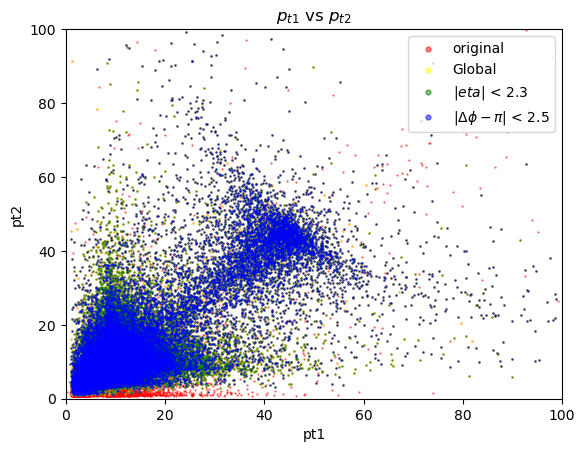

In [152]:
plt.scatter(df['pt1'], df['pt2'], s=0.5, c='red', alpha=0.5, label= 'original')
plt.scatter(corte_MG['pt1'], corte_MG['pt2'], s=0.5, c='yellow', alpha=0.5, label = 'Global')
plt.scatter(corte_MG_eta['pt1'], corte_MG_eta['pt2'], s=0.5, c='green', alpha=0.5, label = r'|$\eta$| < 2.3')
plt.scatter(corte_MG_eta_phi['pt1'], corte_MG_eta_phi['pt2'], s=0.5, c='blue', alpha=0.5, label = r'|$\Delta\phi - \pi$| < 2.5')

plt.legend(markerscale=5)
plt.xlabel('pt1')
plt.ylabel('pt2')
plt.title(r"$p_{t1}$ vs $p_{t2}$")

plt.xlim(0,100)
plt.ylim(0,100)

plt.savefig("pt1pt2_evo.pdf", dpi=300, bbox_inches='tight') 

plt.show()

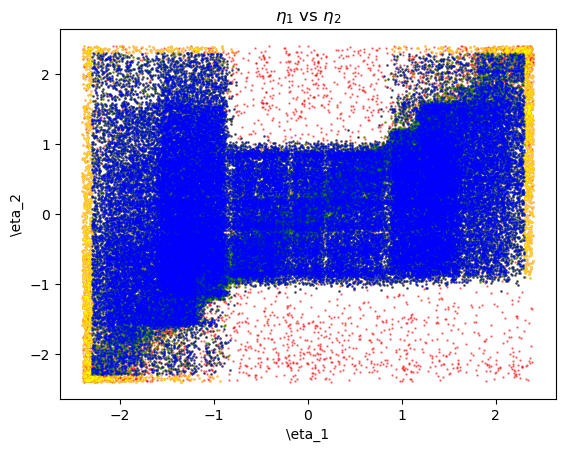

In [142]:
plt.scatter(df['eta1'], df['eta2'], s=0.5, c='red', alpha=0.5, label= 'original')
plt.scatter(corte_MG['eta1'], corte_MG['eta2'], s=0.5, c='yellow', alpha=0.5, label = 'Global')
plt.scatter(corte_MG_eta['eta1'], corte_MG_eta['eta2'], s=0.5, c='green', alpha=0.5, label = r'|$\eta$| < 2.5')
plt.scatter(corte_MG_eta_phi['eta1'], corte_MG_eta_phi['eta2'], s=0.5, c='blue', alpha=0.5, label = r'|$\Delta\phi - \pi$| < 2.5')

plt.xlabel(r'\eta_1')
plt.ylabel(r'\eta_2')
plt.title(r"$\eta_{1}$ vs $\eta_{2}$")

plt.savefig("eta1eta2_evo.pdf", dpi=300, bbox_inches='tight') 
plt.show()

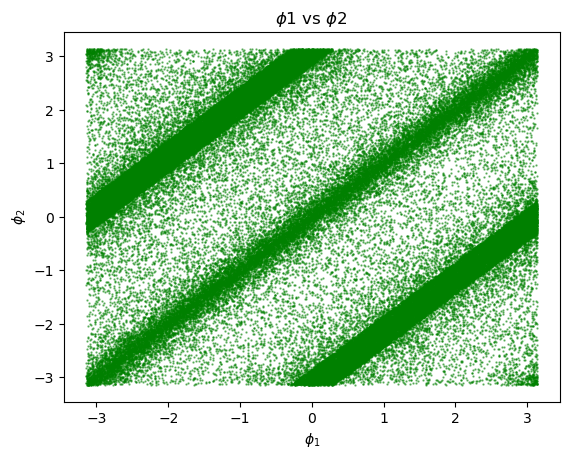

In [28]:
plt.scatter(corte_MG_eta['phi1'], corte_MG_eta['phi2'], s=0.5, c='green', alpha=0.5)
plt.xlabel(r'$\phi_1$')
plt.ylabel(r'$\phi_2$')
plt.title(r"$\phi1$ vs $\phi2$")

plt.savefig("phi1phi2_distribution_ini.png", dpi=300, bbox_inches='tight') 
plt.show()

# Corte en delta phi

In [91]:
d_phi = df['phi1'] - df['phi2']

mask_dphi = (np.abs(np.abs(d_phi) - np.pi) < 2.5)
corte_MG_eta_phi = df[mask_mu & mask_dphi & mask_M & mask_eta].copy()

print('No. de datos',len(corte_MG_eta_phi))
print((len(corte_MG_eta_phi)*100)/100000, '%')
print('No. de datos excluidos:',len(corte_MG_eta) - len(corte_MG_eta_phi))
print(((len(corte_MG_eta) - len(corte_MG_eta_phi))*100)/100000, '%')

No. de datos 67768
67.768 %
No. de datos excluidos: 23343
23.343 %


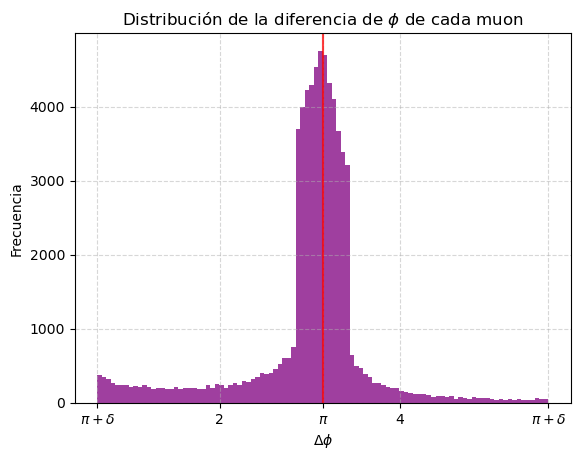

In [134]:
delta_phi_c = corte_MG_eta_phi['phi1'] - corte_MG_eta_phi['phi2']

plt.hist(delta_phi_c.abs(), bins=100, alpha=0.5, color='purple')
plt.xlabel(r'$\Delta \phi$')
plt.ylabel("Frecuencia")
plt.title(r"Distribución de la diferencia de $\phi$ de cada muon")

# Add vertical lines
plt.axvline(x=np.pi, alpha=0.5, color='red')
# Get current ticks and add the special ones
current_xticks = [ 2, 4]  
special_xticks = [np.pi-2.5, np.pi, np.pi+2.5]  # Ticks to highlight
all_xticks = sorted(set(current_xticks + special_xticks))  # Combine and remove duplicates


# Set all ticks (black), then overwrite special ones (red)
plt.xticks(all_xticks, [r'$\pi + \delta$', '2', r'$\pi$', '4', r'$\pi + \delta$'])  # First, apply all ticks

plt.grid(True, linestyle='--', alpha=0.5)
plt.savefig("deltaphi_distri_cut.pdf", dpi=300, bbox_inches='tight') 
plt.show()

# Mass (G, M < 120 GeV,  |$\eta$| < 2.3,  |$\Delta \phi - \pi$| < 2.5)

-----------------------------------
## Intervalo de 0 - 4
----------------------------

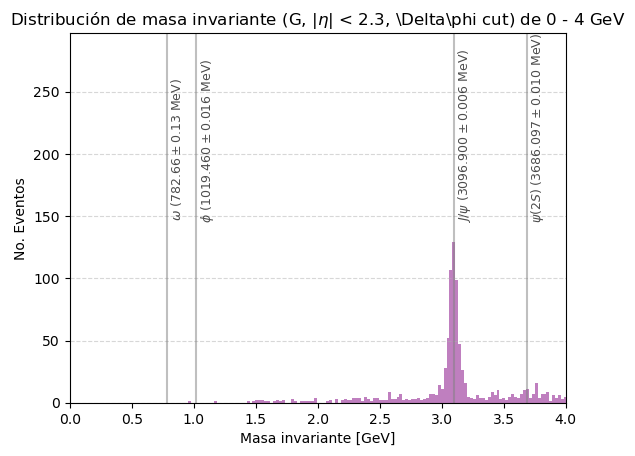

In [122]:
plt.hist(corte_MG_eta_phi['M'], bins = 5000, color='purple', alpha = 0.5)

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title(r"Distribución de masa invariante (G, |$\eta$| < 2.3, \Delta\phi cut) de 0 - 4 GeV")

plt.axvline(x=M_omega, alpha=0.5, c='gray')
plt.text(M_omega + 0.02, plt.ylim()[1]*0.5, 
         r'$\omega$ ($782.66 \pm 0.13$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Phi, alpha=0.5, c='gray')
plt.text(M_Phi + 0.02, plt.ylim()[1]*0.5, 
         r'$\phi$ ($1019.460 \pm 0.016$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_JPsi, alpha=0.5, c='gray')
plt.text(M_JPsi + 0.02, plt.ylim()[1]*0.5, 
         r'$J/\psi$ ($3096.900 \pm 0.006$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Psil, alpha=0.5, c='gray')
plt.text(M_Psil + 0.02, plt.ylim()[1]*0.5, 
         r'$\psi(2S)$ ($3686.097 \pm 0.010$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)


plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0, 4)
#plt.savefig("mass_GMetaphi_0-4.png", dpi=300, bbox_inches='tight') 

plt.show()


-----------------------------
## 4 - 12 GeV
-----------------

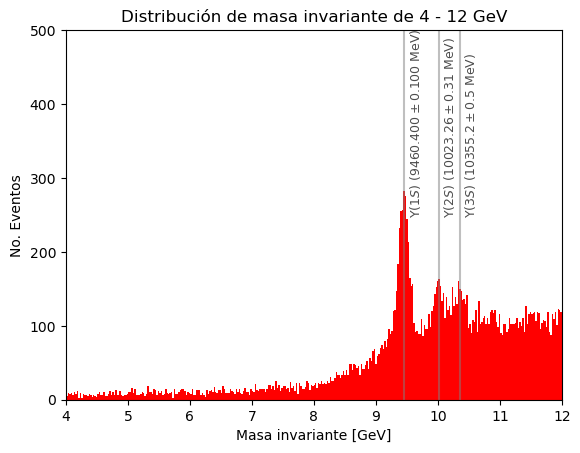

In [89]:
plt.hist(corte_MG_eta_phi['M'], bins = 5000, color='red')

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title(r"Distribución de masa invariante (G, |$\eta$| < 2.3, \Delta\phi cut)  de 4 - 12 GeV")

plt.ylim(0,500)
plt.xlim(4, 12)

plt.axvline(x=M_Y1S, alpha=0.5, c='gray')
plt.text(M_Y1S + 0.05, plt.ylim()[1]*0.5, 
         r'$\Upsilon(1S)$ ($9460.400 \pm 0.100$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y2S, alpha=0.5, c='gray')
plt.text(M_Y2S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(2S)$ ($10023.26 \pm 0.31$ MeV)',
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y3S, alpha=0.5, c='gray')
plt.text(M_Y3S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(3S)$ ($10355.2 \pm 0.5$ MeV)',
         rotation=90, alpha=0.7, fontsize=9) 


# plt.savefig("mass_GMetaphi_4-12.pdf", dpi=300, bbox_inches='tight') 

plt.show()

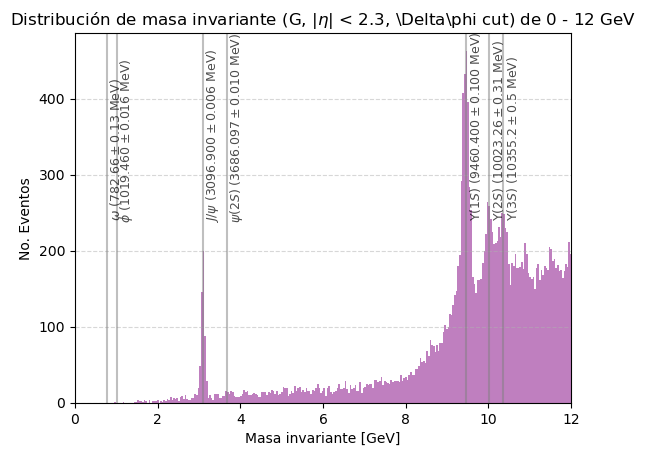

In [123]:
plt.hist(corte_MG_eta_phi['M'], bins = 3000, color='purple', alpha = 0.5)

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title(r"Distribución de masa invariante (G, |$\eta$| < 2.3, \Delta\phi cut) de 0 - 12 GeV")

plt.axvline(x=M_omega, alpha=0.5, c='gray')
plt.text(M_omega + 0.02, plt.ylim()[1]*0.5, 
         r'$\omega$ ($782.66 \pm 0.13$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Phi, alpha=0.5, c='gray')
plt.text(M_Phi + 0.02, plt.ylim()[1]*0.5, 
         r'$\phi$ ($1019.460 \pm 0.016$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_JPsi, alpha=0.5, c='gray')
plt.text(M_JPsi + 0.02, plt.ylim()[1]*0.5, 
         r'$J/\psi$ ($3096.900 \pm 0.006$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Psil, alpha=0.5, c='gray')
plt.text(M_Psil + 0.02, plt.ylim()[1]*0.5, 
         r'$\psi(2S)$ ($3686.097 \pm 0.010$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y1S, alpha=0.5, c='gray')
plt.text(M_Y1S + 0.05, plt.ylim()[1]*0.5, 
         r'$\Upsilon(1S)$ ($9460.400 \pm 0.100$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y2S, alpha=0.5, c='gray')
plt.text(M_Y2S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(2S)$ ($10023.26 \pm 0.31$ MeV)',
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y3S, alpha=0.5, c='gray')
plt.text(M_Y3S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(3S)$ ($10355.2 \pm 0.5$ MeV)',
         rotation=90, alpha=0.7, fontsize=9) 

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0,12)

# plt.savefig("mass_G_0-12.pdf", dpi=300, bbox_inches='tight') 
plt.show()

-------------------------------
## 60 - 120 GeV
-----------------

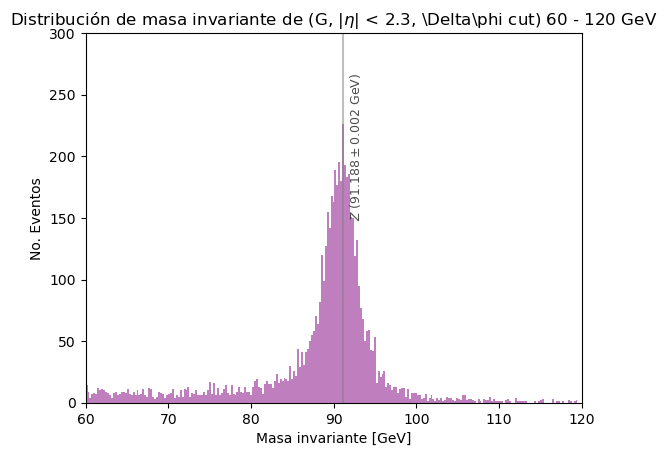

In [124]:
plt.hist(corte_MG_eta_phi['M'], bins = 500, color='purple', alpha = 0.5)

plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title(r"Distribución de masa invariante de (G, |$\eta$| < 2.3, \Delta\phi cut) 60 - 120 GeV")
plt.xlim(60, 120)
plt.ylim(0, 300)

plt.axvline(x=M_Z, alpha=0.5, c='gray')
plt.text(M_Z + 0.5, plt.ylim()[1]*0.5, 
         r'$Z$ ($91.188 \pm 0.002$ GeV)',
         rotation=90, alpha=0.7, fontsize=9)

# plt.savefig("mass_GMetaphi_80-120.pdf", dpi=300, bbox_inches='tight') 
plt.show()

# Evolucion de la masa invariante

## 0 - 12 GeV

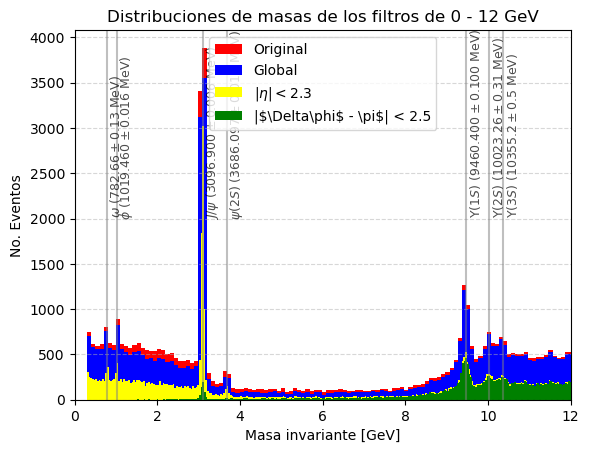

In [143]:
plt.hist(df['M'], bins = 3000, color='red', alpha = 1, label = 'Original')
plt.hist(corte_G['M'], bins = 3000, color='blue', alpha = 1, label = r'Global')
plt.hist(corte_MG_eta['M'], bins = 3000, color='yellow', alpha = 1, label = r'|$\eta| < 2.3$')
plt.hist(corte_MG_eta_phi['M'], bins = 3000, color='green', alpha = 1, label = r'|$\Delta\phi$ - \pi$| < 2.5')

plt.legend()
plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title(r"Distribuciones de masas de los filtros de 0 - 12 GeV")

plt.axvline(x=M_omega, alpha=0.5, c='gray')
plt.text(M_omega + 0.02, plt.ylim()[1]*0.5, 
         r'$\omega$ ($782.66 \pm 0.13$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Phi, alpha=0.5, c='gray')
plt.text(M_Phi + 0.02, plt.ylim()[1]*0.5, 
         r'$\phi$ ($1019.460 \pm 0.016$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_JPsi, alpha=0.5, c='gray')
plt.text(M_JPsi + 0.02, plt.ylim()[1]*0.5, 
         r'$J/\psi$ ($3096.900 \pm 0.006$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Psil, alpha=0.5, c='gray')
plt.text(M_Psil + 0.02, plt.ylim()[1]*0.5, 
         r'$\psi(2S)$ ($3686.097 \pm 0.010$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y1S, alpha=0.5, c='gray')
plt.text(M_Y1S + 0.05, plt.ylim()[1]*0.5, 
         r'$\Upsilon(1S)$ ($9460.400 \pm 0.100$ MeV)', 
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y2S, alpha=0.5, c='gray')
plt.text(M_Y2S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(2S)$ ($10023.26 \pm 0.31$ MeV)',
         rotation=90, alpha=0.7, fontsize=9)

plt.axvline(x=M_Y3S, alpha=0.5, c='gray')
plt.text(M_Y3S + 0.05, plt.ylim()[1]*0.5,
         r'$\Upsilon(3S)$ ($10355.2 \pm 0.5$ MeV)',
         rotation=90, alpha=0.7, fontsize=9) 

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(0,12)

plt.savefig("mass_evo_0-12.pdf", dpi=300, bbox_inches='tight') 
plt.show()

## 60 - 120 GeV

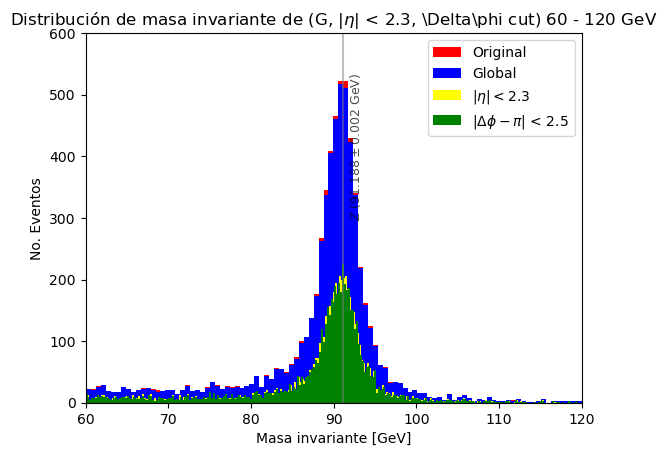

In [144]:
plt.hist(df['M'], bins = 500, color='red', alpha = 1, label = 'Original')
plt.hist(corte_G['M'], bins = 500, color='blue', alpha = 1, label = r'Global')
plt.hist(corte_MG_eta['M'], bins = 500, color='yellow', alpha = 1, label = r'|$\eta| < 2.3$')
plt.hist(corte_MG_eta_phi['M'], bins = 500, color='green', alpha = 1, label = r'|$\Delta\phi - \pi$| < 2.5')

plt.legend()
plt.xlabel("Masa invariante [GeV]")
plt.ylabel("No. Eventos")
plt.title(r"Distribución de masa invariante de (G, |$\eta$| < 2.3, \Delta\phi cut) 60 - 120 GeV")
plt.xlim(60, 120)
plt.ylim(0, 600)

plt.axvline(x=M_Z, alpha=0.5, c='gray')
plt.text(M_Z + 0.5, plt.ylim()[1]*0.5, 
         r'$Z$ ($91.188 \pm 0.002$ GeV)',
         rotation=90, alpha=0.7, fontsize=9)

plt.savefig("mass_evo_80-120.pdf", dpi=300, bbox_inches='tight') 
plt.show()

# MASA y ANCHURA DE Z

In [160]:
mask_Z  = np.abs(df['M'] - M_Z) < 30

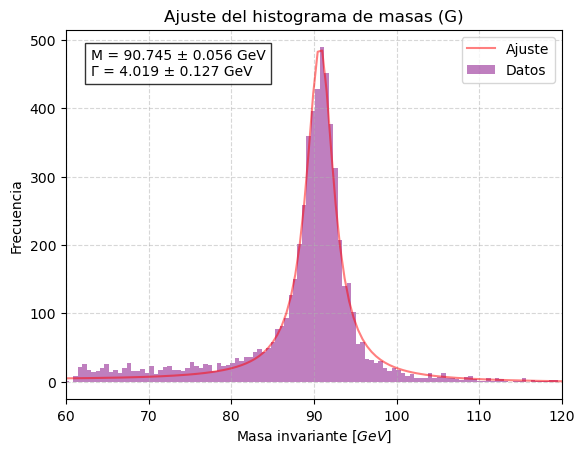

In [169]:
corte_GZ = df[mask_mu & mask_Z] 

M_G = np.sqrt(2*corte_GZ['pt1']*corte_GZ['pt2']*
              (np.cosh(corte_GZ['eta1'] - corte_GZ['eta2']) - np.cos(corte_GZ['phi1'] - corte_GZ['phi2'])))
M_G = M_G[np.isfinite(M_G)]


frec, bin_edges = np.histogram(M_G, bins=200)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

#Parametros para el ajuste
params = model.make_params(A=max(frec), M=91.2, gamma=2.5,
                          m=0, b=0)
params['M'].set(min=60, max=120)
params['gamma'].set(min=0.1, max=5) 

W = np.zeros_like(frec, dtype=float)  
mask = frec > 0
W[mask] = 1 / np.sqrt(frec[mask])

ajuste = model.fit(frec, params, x = bin_centers, weights=W)

plt.bar(bin_centers, frec, width=bin_edges[1]-bin_edges[0], alpha=0.5, color = 'purple', label='Datos')
plt.plot(bin_centers, ajuste.best_fit, 'r-', label='Ajuste', alpha=0.5)
plt.xlabel(r"Masa invariante [$GeV$]")
plt.ylabel("Frecuencia")
plt.title(r"Ajuste del histograma de masas (G)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xlim(60,120)
# Add fit parameters to plot
fit_text = (
    f"M = {ajuste.params['M'].value:.3f} ± {ajuste.params['M'].stderr:.3f} GeV\n"
    f"Γ = {ajuste.params['gamma'].value:.3f} ± {ajuste.params['gamma'].stderr:.3f} GeV"
)
plt.text(0.05, 0.95, fit_text, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))


plt.savefig("mass_fit_Global.pdf", dpi=300, bbox_inches='tight') 
plt.show()

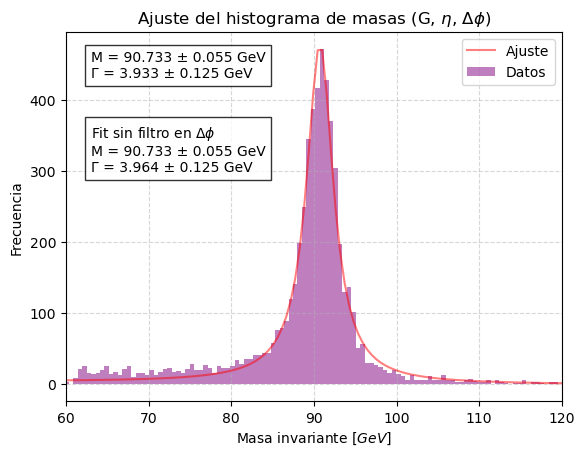

In [170]:

corte_GZ_eta = df[mask_mu & mask_Z & mask_eta & mask_dphi] 

M_G = np.sqrt(2*corte_GZ_eta['pt1']*corte_GZ_eta['pt2']*
              (np.cosh(corte_GZ_eta['eta1'] - corte_GZ_eta['eta2']) - np.cos(corte_GZ_eta['phi1'] - corte_GZ_eta['phi2'])))
M_G = M_G[np.isfinite(M_G)]


frec, bin_edges = np.histogram(M_G, bins=200)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

#Parametros para el ajuste
params = model.make_params(A=max(frec), M=91.2, gamma=2.5,
                          m=0, b=0)
params['M'].set(min=60, max=120)
params['gamma'].set(min=0.1, max=5) 

W = np.zeros_like(frec, dtype=float)  
mask = frec > 0
W[mask] = 1 / np.sqrt(frec[mask])

ajuste = model.fit(frec, params, x = bin_centers, weights=W)

plt.bar(bin_centers, frec, width=bin_edges[1]-bin_edges[0], alpha=0.5, color = 'purple', label='Datos')
plt.plot(bin_centers, ajuste.best_fit, 'r-', label='Ajuste', alpha=0.5)
plt.xlabel(r"Masa invariante [$GeV$]")
plt.ylabel("Frecuencia")
plt.title(r"Ajuste del histograma de masas (G, $\eta$, $\Delta\phi$)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.xlim(60,120)
# Add fit parameters to plot
fit_text = (
    f"M = {ajuste.params['M'].value:.3f} ± {ajuste.params['M'].stderr:.3f} GeV\n"
    f"Γ = {ajuste.params['gamma'].value:.3f} ± {ajuste.params['gamma'].stderr:.3f} GeV"
)
plt.text(0.05, 0.95, fit_text, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
fit_text = (
    r'Fit sin filtro en $\Delta\phi$'
    f'\n'
    f"M = 90.733 ± 0.055 GeV\n"
    f"Γ = 3.964 ± 0.125 GeV"
)
plt.text(0.05, 0.75, fit_text, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.savefig("mass_fit_dphi.pdf", dpi=300, bbox_inches='tight') 
plt.show()

In [171]:
def error_porcentual(medido, real):
    return abs((medido - real) / real) * 100
MR = 91.1880
GammaR = 2.4955
Mexp = ajuste.params['M'].value
Gammaexp = ajuste.params['gamma'].value
errorM = error_porcentual(Mexp, MR)
errorG = error_porcentual(Gammaexp, GammaR)
print(f"Error porcentual Masa: {errorM:.2f}%")
print(f"Error porcentual Gamma: {errorG:.2f}%")

Error porcentual Masa: 0.50%
Error porcentual Gamma: 57.60%
